## Lead Score - Case Study

## Problem Statement
An X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Loading and Cleaning Data

## Importing and reading the Data

In [2]:
# Reading the Data Frame

lead_df = pd.read_csv('C:\\Users\\apeks\\Downloads\\Leads.csv')
lead_df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

## Inspect the dataframe

It will help us to get the insights and view of Dataframe.

In [3]:
# Checking data info (Which will give count of non null values, data types available etc.)

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking the first five rows of the dataframe

lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# Checking the shape of data frame

lead_df.shape

(9240, 37)

In [6]:
# checking the statistical info of the data

lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Cleaning the dataframe

In [7]:
# Converting all the values to lower case

lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)

lead_df = lead_df.replace('select',np.nan)

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis

lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique valued columns as no inferation can be created using the same

lead_df1= lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking the percentage of missing values

round(100*(lead_df1.isnull().sum()/len(lead_df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Removing all the columns that are not much of use as it have >=35% null values

lead_df2 = lead_df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)

lead_df2.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      unemployed   
1   india                      NaN                      unemployed   
2   india  business administration                         student   
3   india    media and advertising                      unemployed   
4   india                      NaN                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

In [13]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### There is still large no of null values in 4 columns as seen above. 
#### But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [14]:
# Replacing the NaN with 'not provided' value

lead_df2['Specialization'] = lead_df2['Specialization'].fillna('not provided') 

lead_df2['What matters most to you in choosing a course'] = lead_df2['What matters most to you in choosing a course'].fillna('not provided')

lead_df2['Country'] = lead_df2['Country'].fillna('not provided')

lead_df2['What is your current occupation'] = lead_df2['What is your current occupation'].fillna('not provided')

lead_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### Here we can see all the values having NaN is replaced with 'not provided' hence not much null values.

In [16]:
# Checking the count of values for Country details

lead_df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

#### Here we can see count for India is the highest and not provided category is 2nd highest

In [17]:
# Changing the rest of the categories to outside india except india and not provided

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df2['Country'] = lead_df2.apply(lambda x:slots(x['Country']), axis = 1)
lead_df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# checking missing values in variable lead source

lead_df2['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

#### So as we can see Google appears the most ; lets replace the missing values with Google. 


In [20]:
# replacing missing values with Google for variable 'Lead Source'

lead_df2['Lead Source'] = lead_df2['Lead Source'].replace(np.nan,'google')

In [21]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [22]:
# checking missing values in variable Total visits

lead_df2['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

#### We can see 0.0 is the most occurring, however in this case it is more preferable to replace with median as it is a continuous variable rather than categorical.

In [23]:
# replacing the variable 'Totalvisits' with median
lead_df2['TotalVisits'] = lead_df2['TotalVisits'].replace(np.nan,lead_df2['TotalVisits'].median())

In [24]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### Here again the max value count is for is 0.0, So it is preferable to replace with median again as done earlier


In [25]:
# replacing missing values with median for variable 'Page Views Per Visit'

lead_df2['Page Views Per Visit'] = lead_df2['Page Views Per Visit'].replace(np.nan,lead_df2['Page Views Per Visit'].median())

In [26]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### The variable 'Last Activity' does have some missing value but before treating it we know that it is a redundant variable, as it seems to be of no use for our analysis. So, lets drop it rather than treating it or imputing it with other variables.

In [27]:
# Dropping the variable 'Last Activity'
lead_df2 = lead_df2.drop('Last Activity',axis=1)

In [28]:
# Rechecking the percentage of missing values

round(100*(lead_df2.isnull().sum()/len(lead_df2.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [29]:
# To familiarize all the categorical values

for column in lead_df2:
    print(lead_df2[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference         

In [30]:
# Removing Id values since they are unique for everyone

Lead_df_final = lead_df2.drop('Prospect ID',1)
Lead_df_final.shape

(9240, 20)

# EDA (Exploratory Data Analysis)


### Univariate Analysis

#### Categorical Variables

In [31]:
Lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

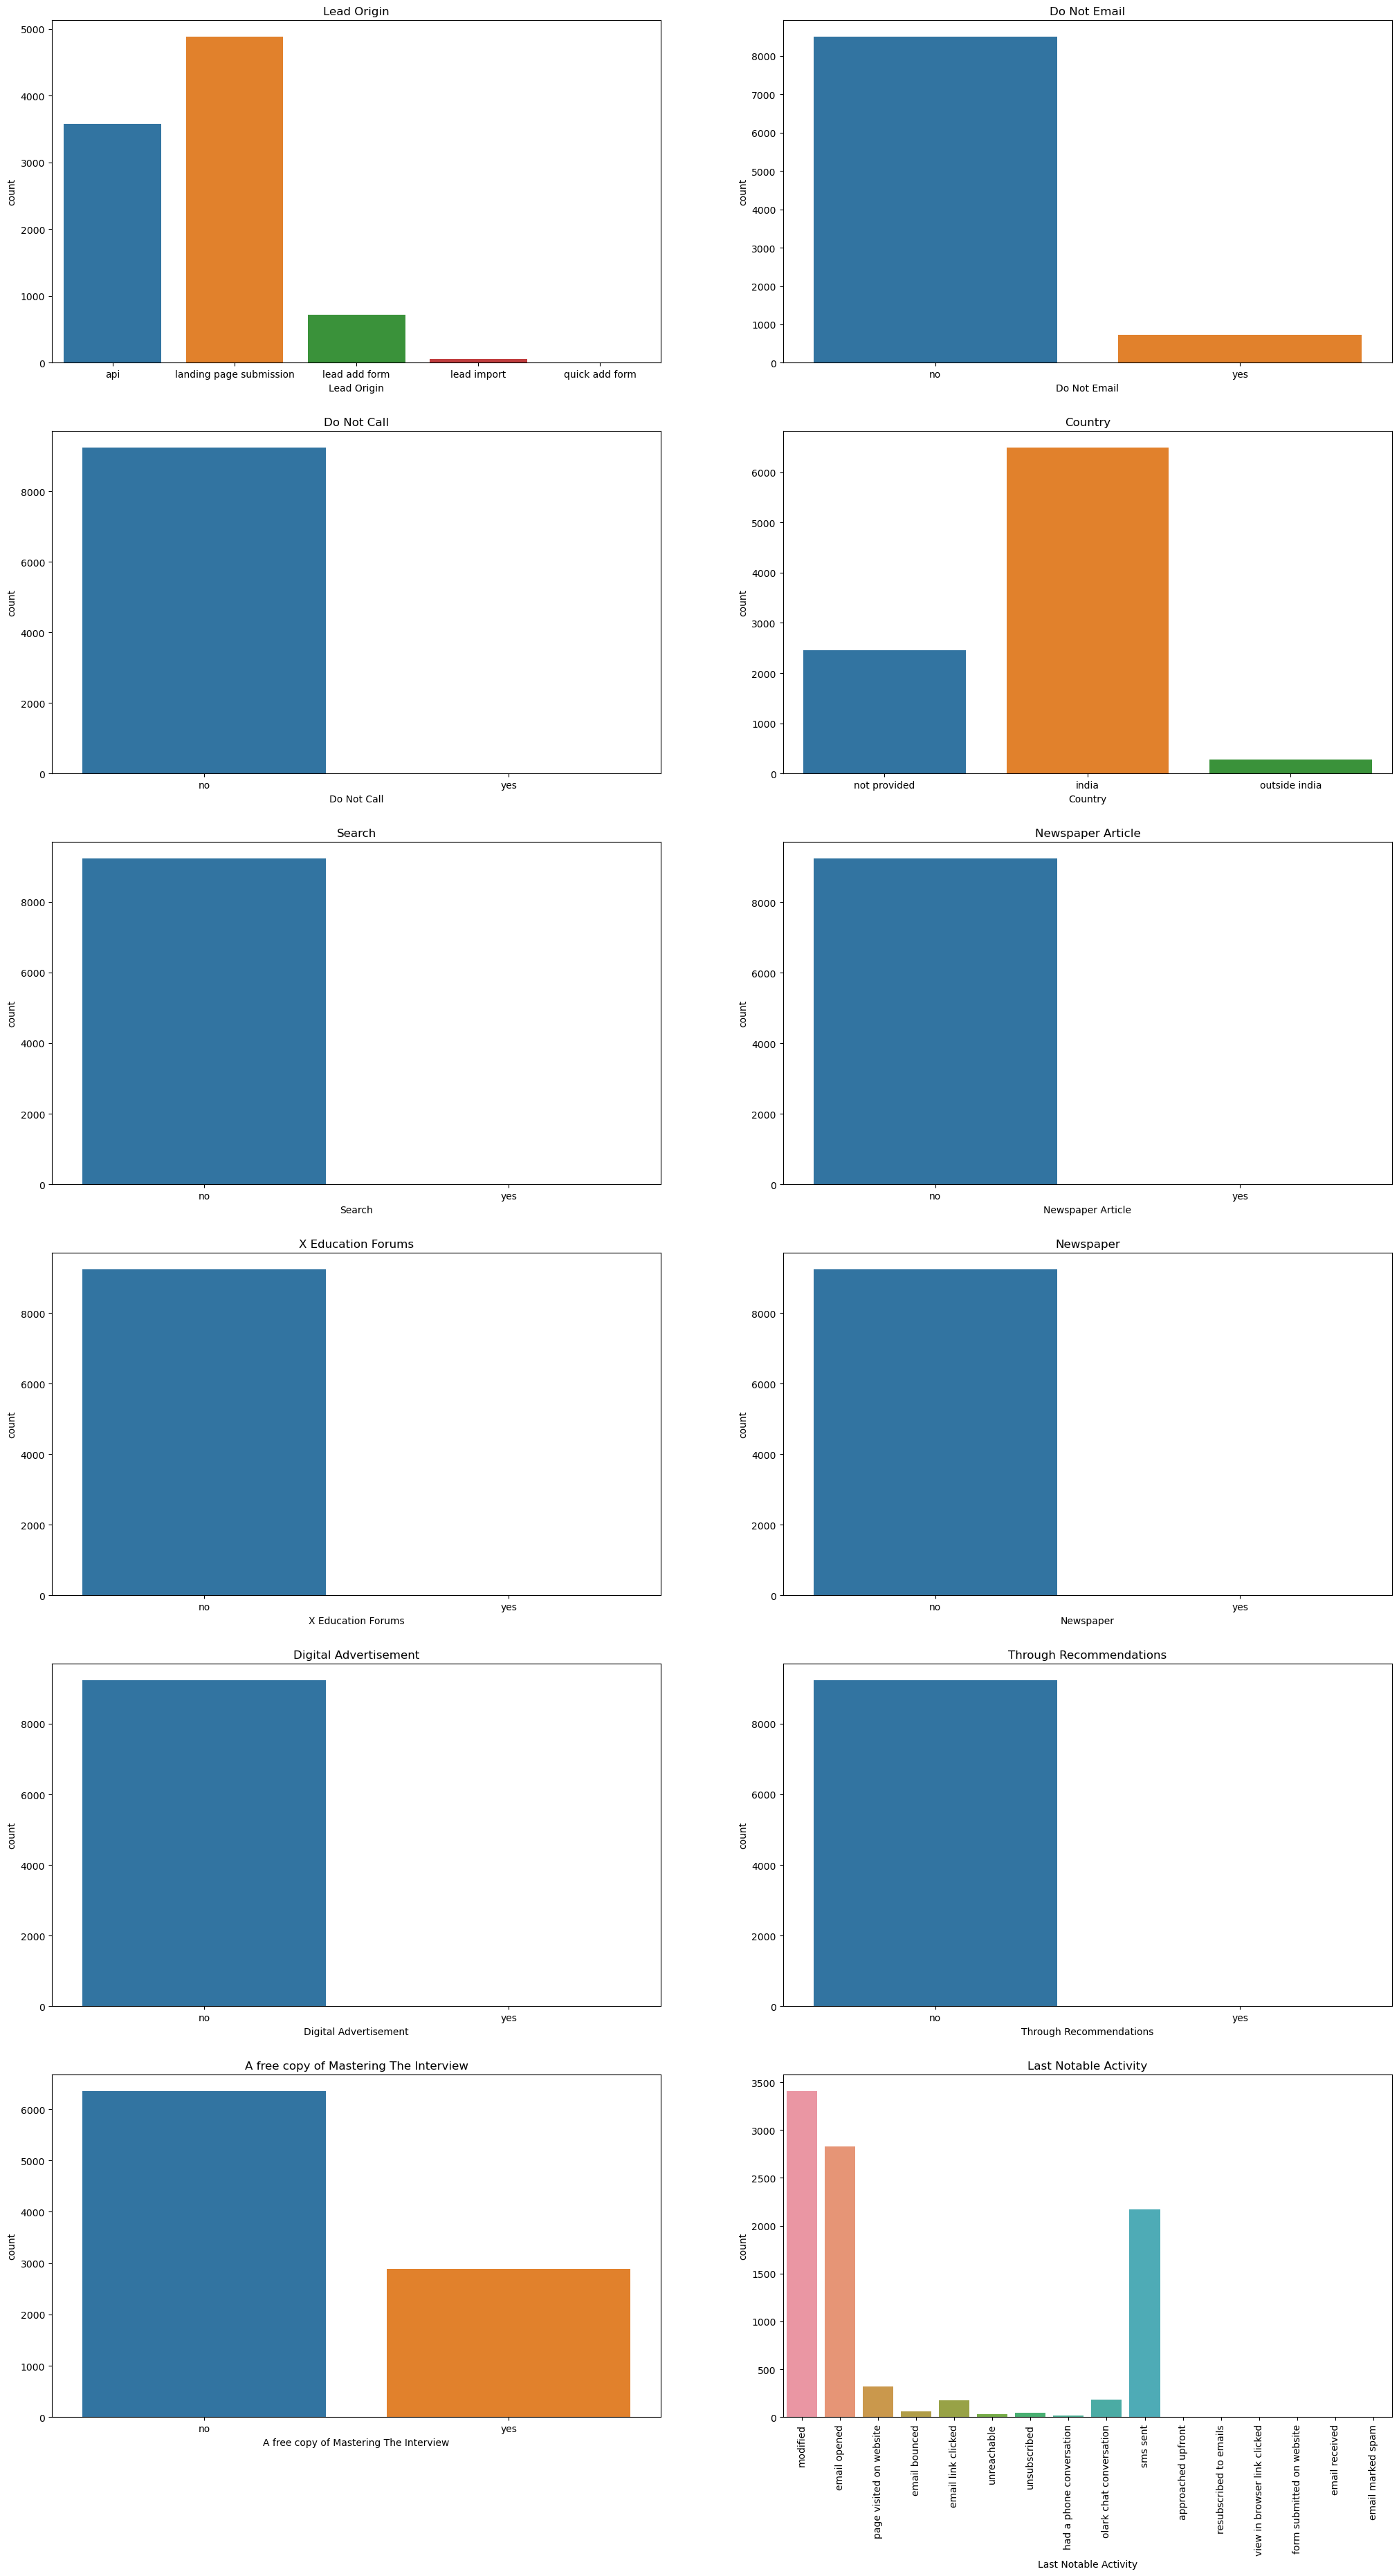

In [32]:
# plotting the graphs for univariate analysis
plt.figure(figsize=(25, 45))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=Lead_df_final)
plt.title('Lead Origin')

plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=Lead_df_final)
plt.title('Do Not Email')

plt.subplot(6, 2, 3)
sns.countplot(x='Do Not Call', data=Lead_df_final)
plt.title('Do Not Call')

plt.subplot(6, 2, 4)
sns.countplot(x='Country', data=Lead_df_final)
plt.title('Country')

plt.subplot(6, 2, 5)
sns.countplot(x='Search', data=Lead_df_final)
plt.title('Search')

plt.subplot(6, 2, 6)
sns.countplot(x='Newspaper Article', data=Lead_df_final)
plt.title('Newspaper Article')

plt.subplot(6, 2, 7)
sns.countplot(x='X Education Forums', data=Lead_df_final)
plt.title('X Education Forums')

plt.subplot(6, 2, 8)
sns.countplot(x='Newspaper', data=Lead_df_final)
plt.title('Newspaper')

plt.subplot(6, 2, 9)
sns.countplot(x='Digital Advertisement', data=Lead_df_final)
plt.title('Digital Advertisement')

plt.subplot(6, 2, 10)
sns.countplot(x='Through Recommendations', data=Lead_df_final)
plt.title('Through Recommendations')

plt.subplot(6, 2, 11)
sns.countplot(x='A free copy of Mastering The Interview', data=Lead_df_final)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6, 2, 12)
sns.countplot(x='Last Notable Activity', data=Lead_df_final)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)

plt.show()

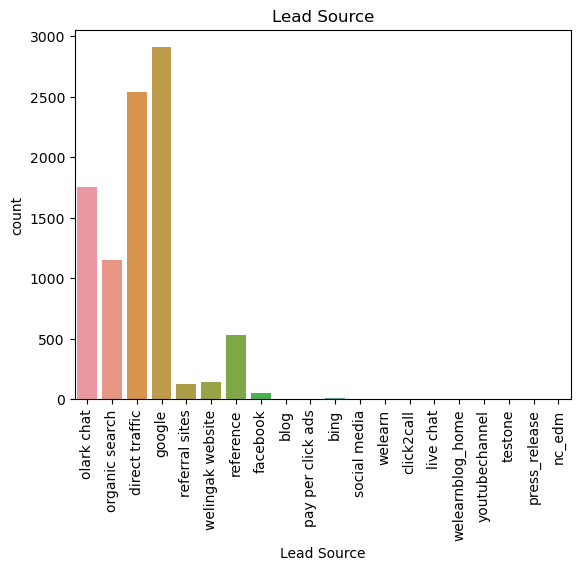

In [33]:
# Plotting the Lead Source for univariate analysis
sns.countplot(x='Lead Source', data=Lead_df_final).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()


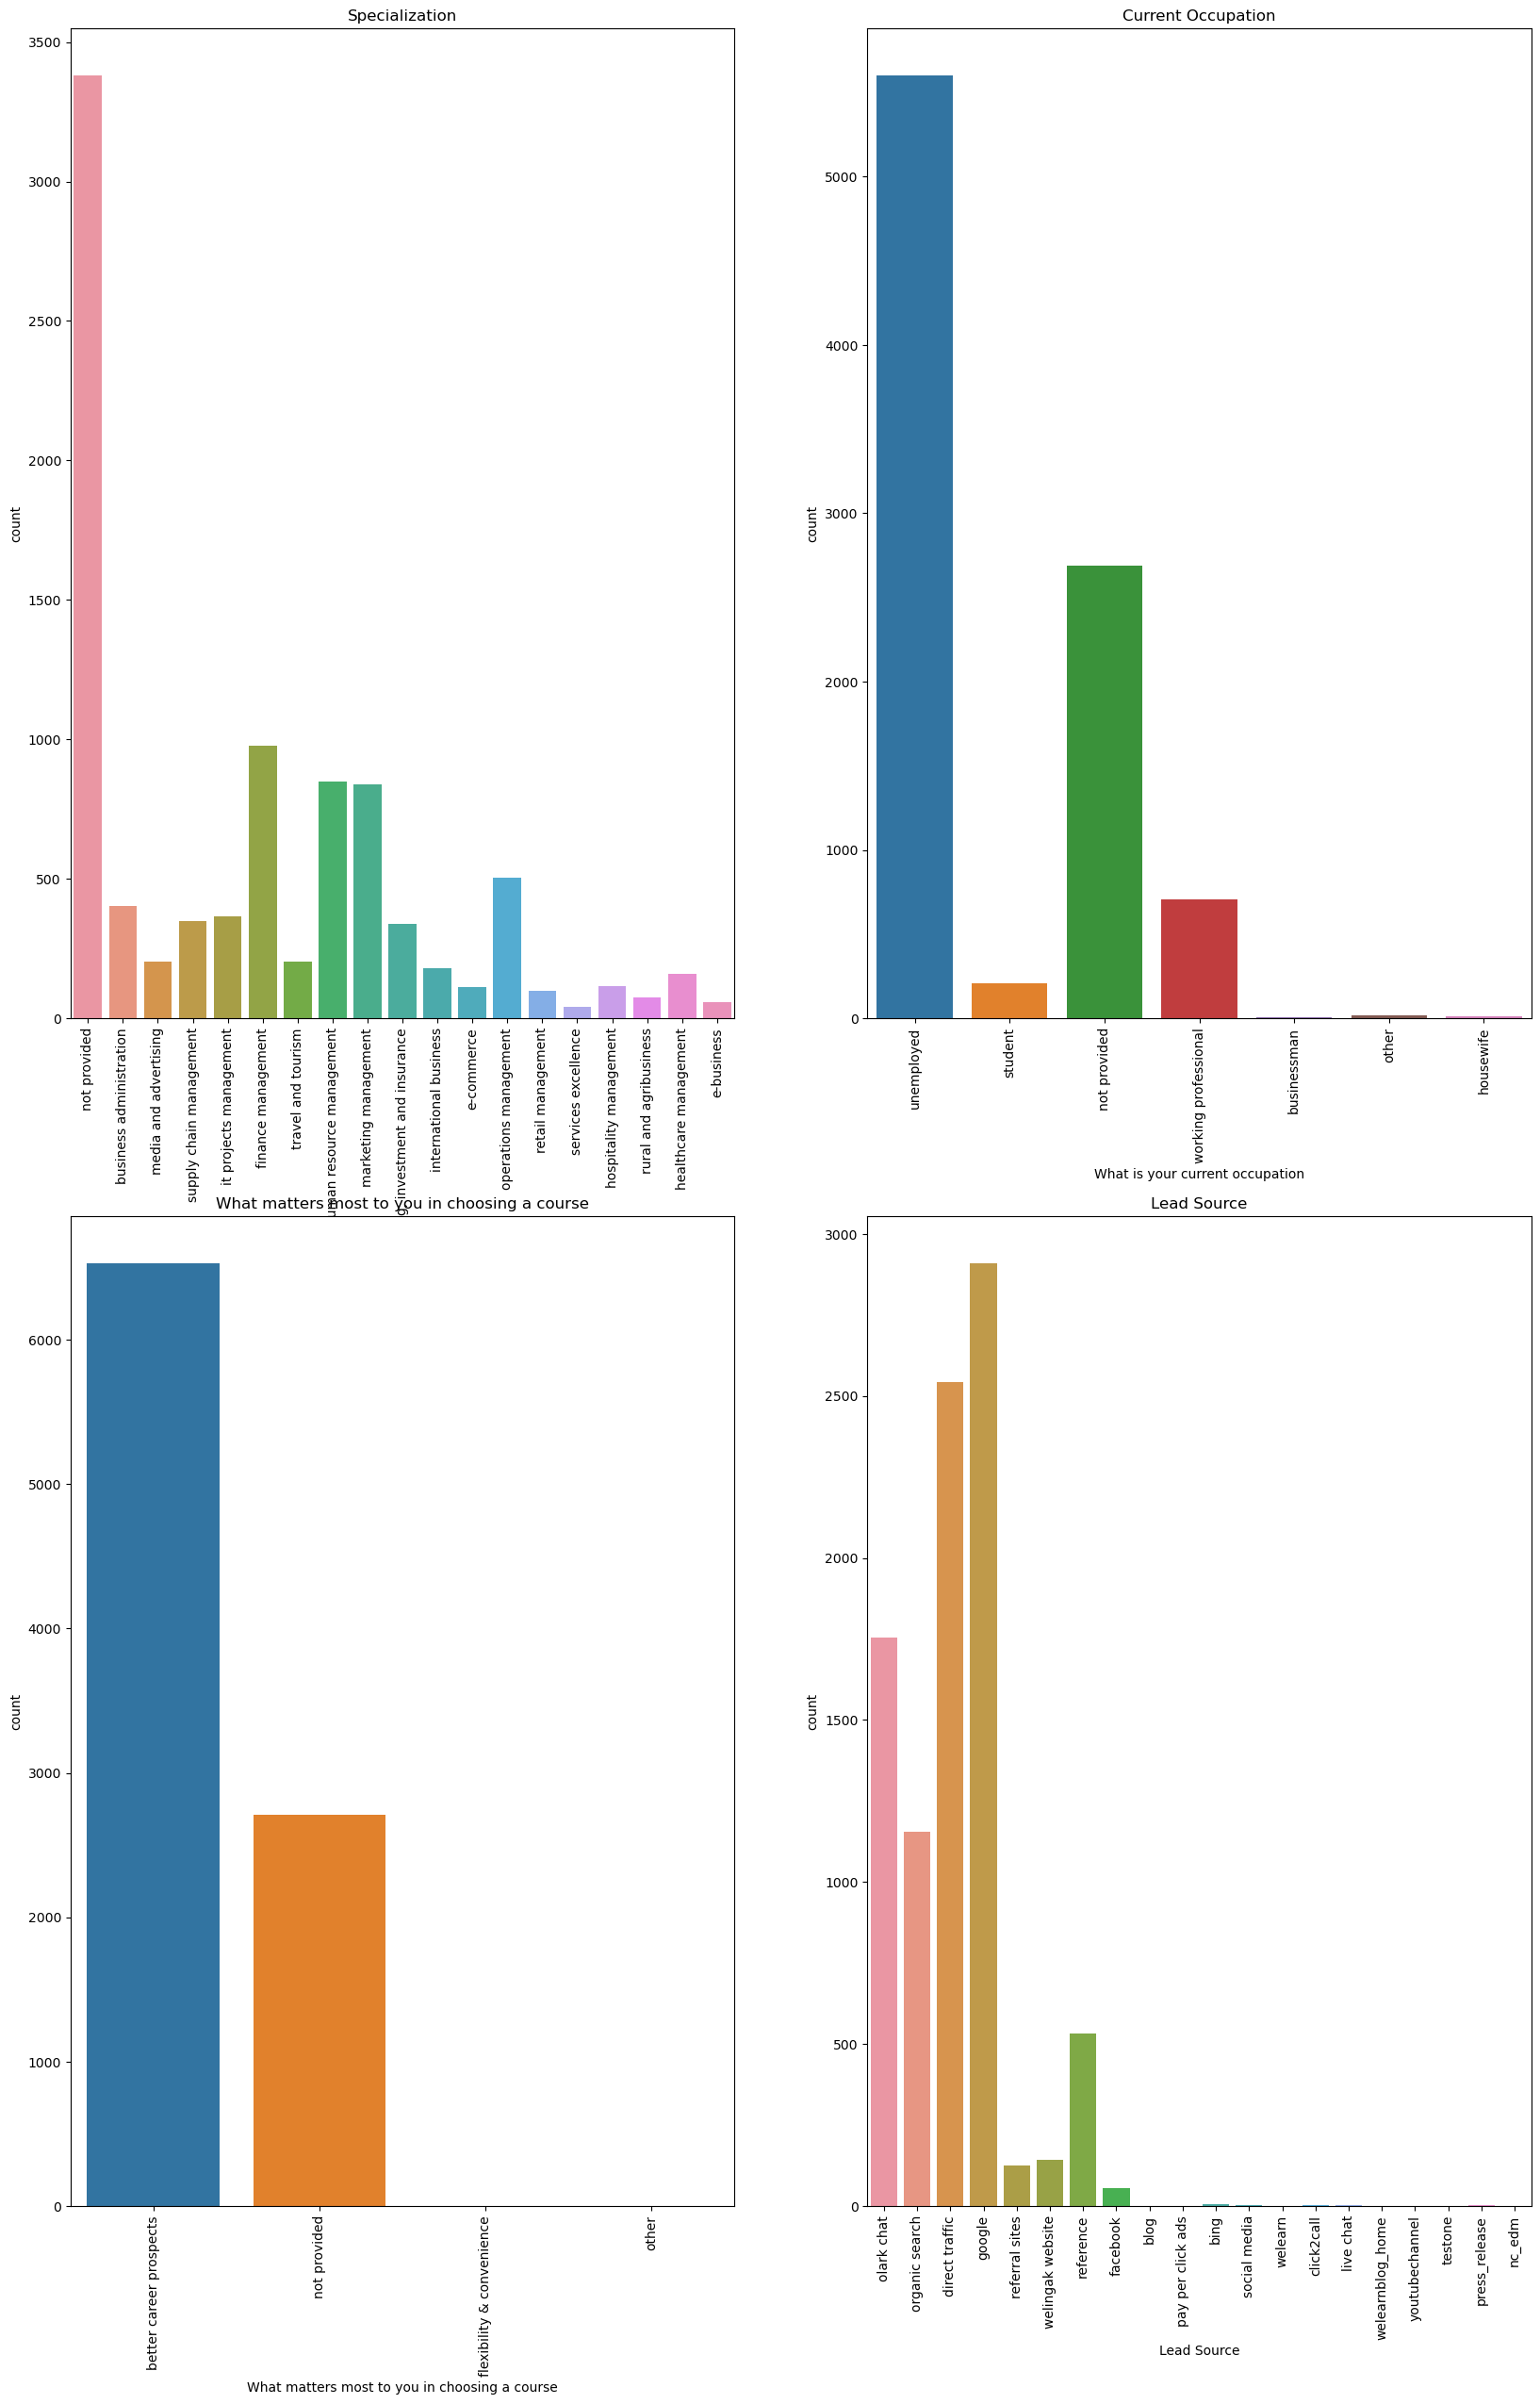

In [34]:
# plotting the different variables for analysis

plt.figure(figsize=(20, 30))

plt.subplot(2, 2, 1)
sns.countplot(x='Specialization', data=Lead_df_final).tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(2, 2, 2)
sns.countplot(x='What is your current occupation', data=Lead_df_final).tick_params(axis='x', rotation=90)
plt.title('Current Occupation')

plt.subplot(2, 2, 3)
sns.countplot(x='What matters most to you in choosing a course', data=Lead_df_final).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2, 2, 4)
sns.countplot(x='Lead Source', data=Lead_df_final).tick_params(axis='x', rotation=90)
plt.title('Lead Source')

plt.show()

In [35]:
# Checking the unique values and their counts in the 'Converted' column
print(Lead_df_final['Converted'].value_counts())


0    5679
1    3561
Name: Converted, dtype: int64


In [36]:
# Check the unique values and their counts in the 'Converted' column
print(Lead_df_final['Converted'].value_counts())

0    5679
1    3561
Name: Converted, dtype: int64


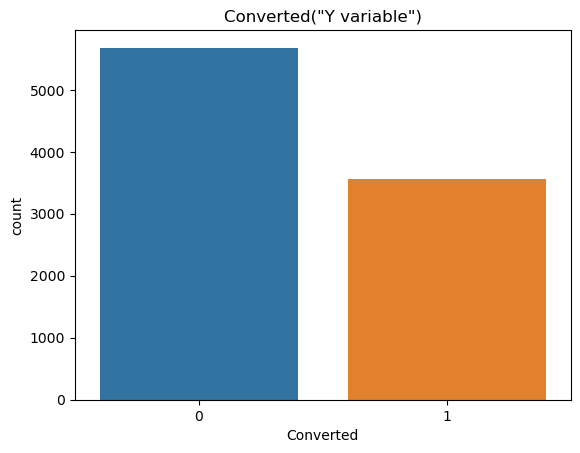

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories explicitly
categories = [0, 1]

# Plot with explicit category ordering
sns.countplot(x='Converted', data=Lead_df_final, order=categories)
plt.title('Converted("Y variable")')
plt.show()


#### Numerical Variables

In [38]:
Lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

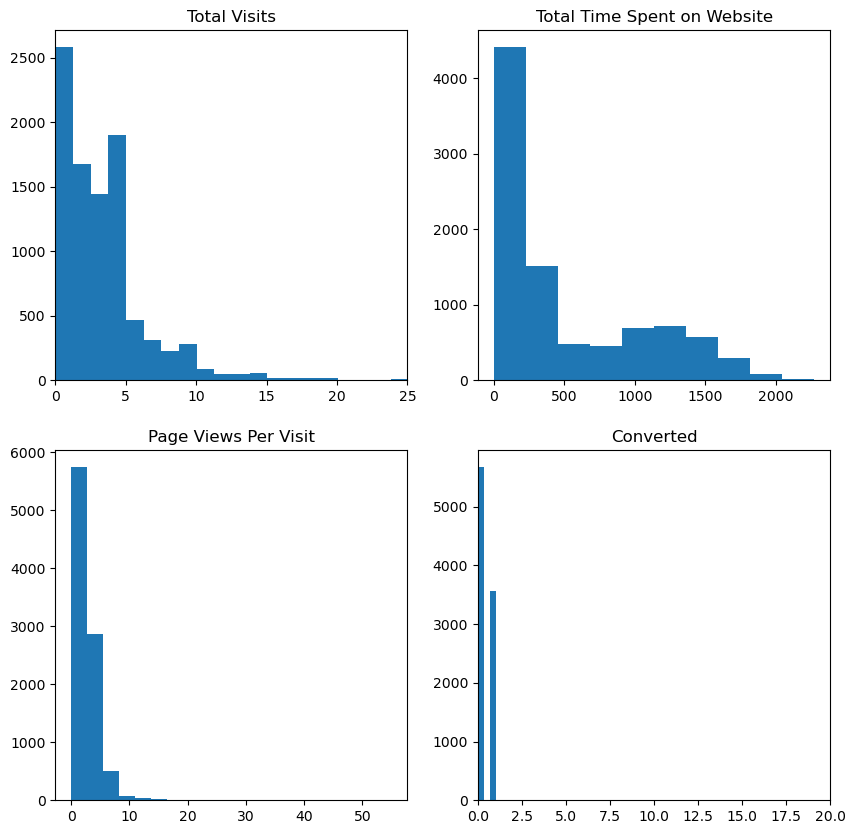

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')

plt.subplot(2,2,4)
plt.hist(Lead_df_final['Converted'], bins = 3)
plt.title('Converted')

plt.xlim(0,20)
plt.show()

### Relating all the categorical variables to Converted


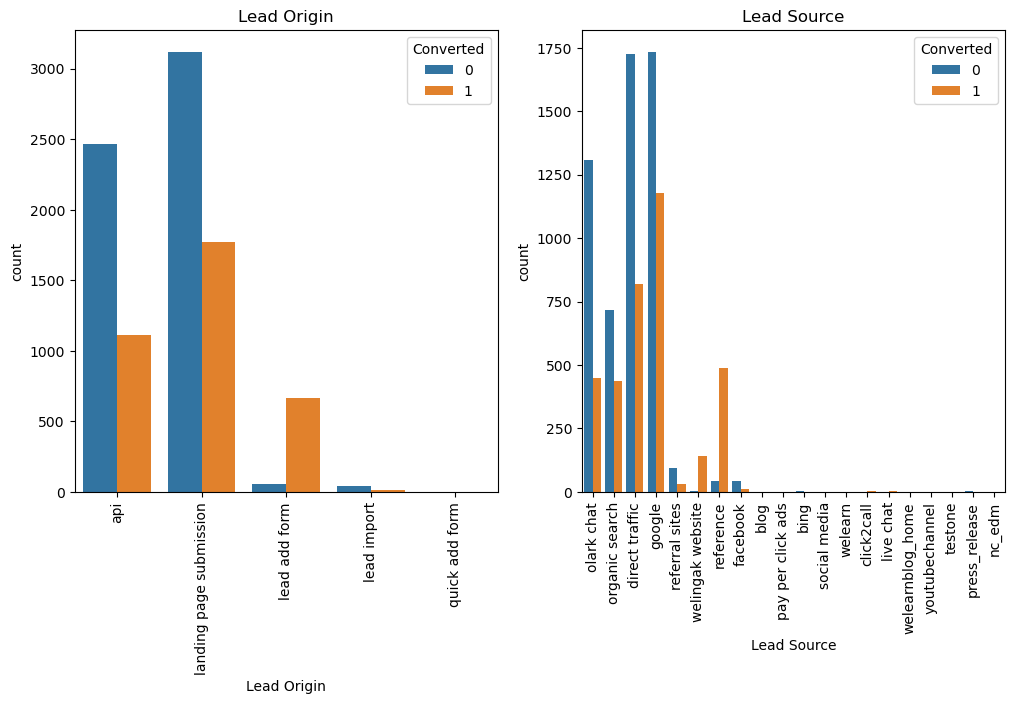

In [41]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

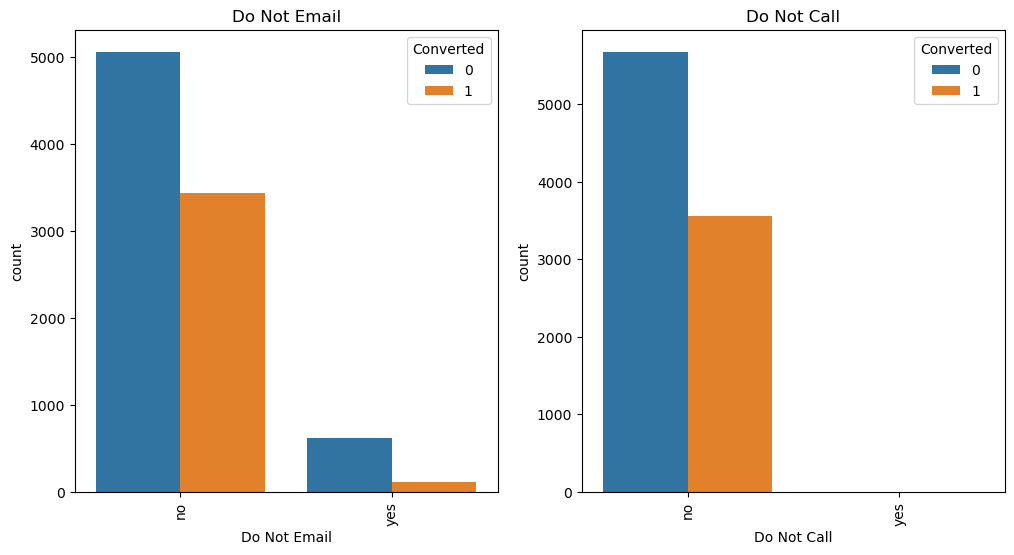

In [42]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

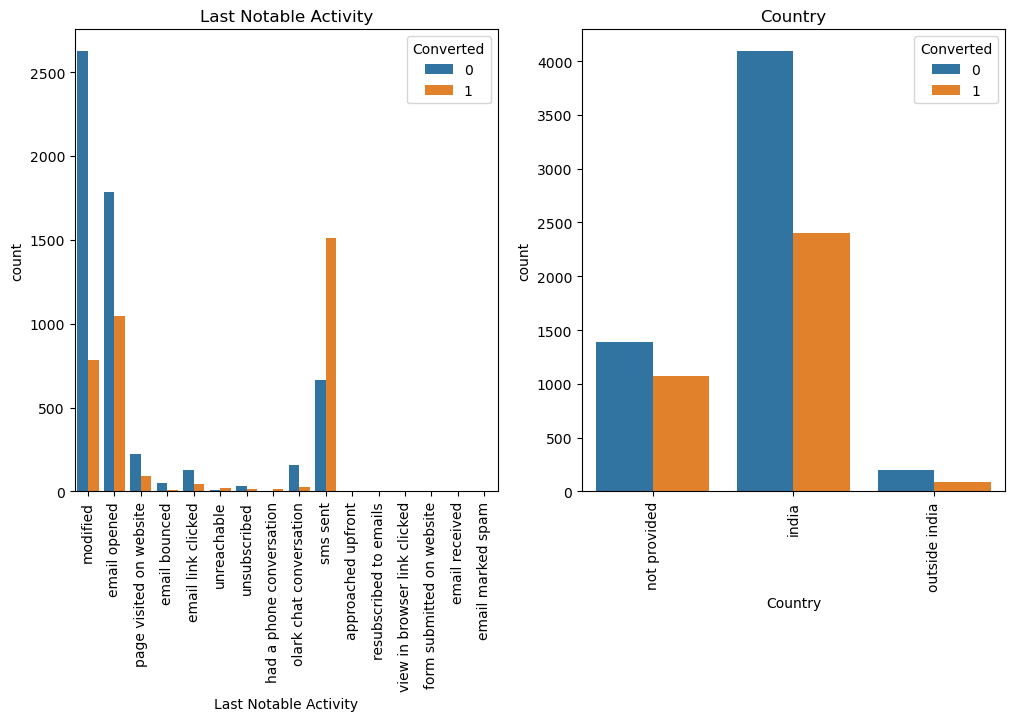

In [43]:
plt.figure(figsize = (12,6))


plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

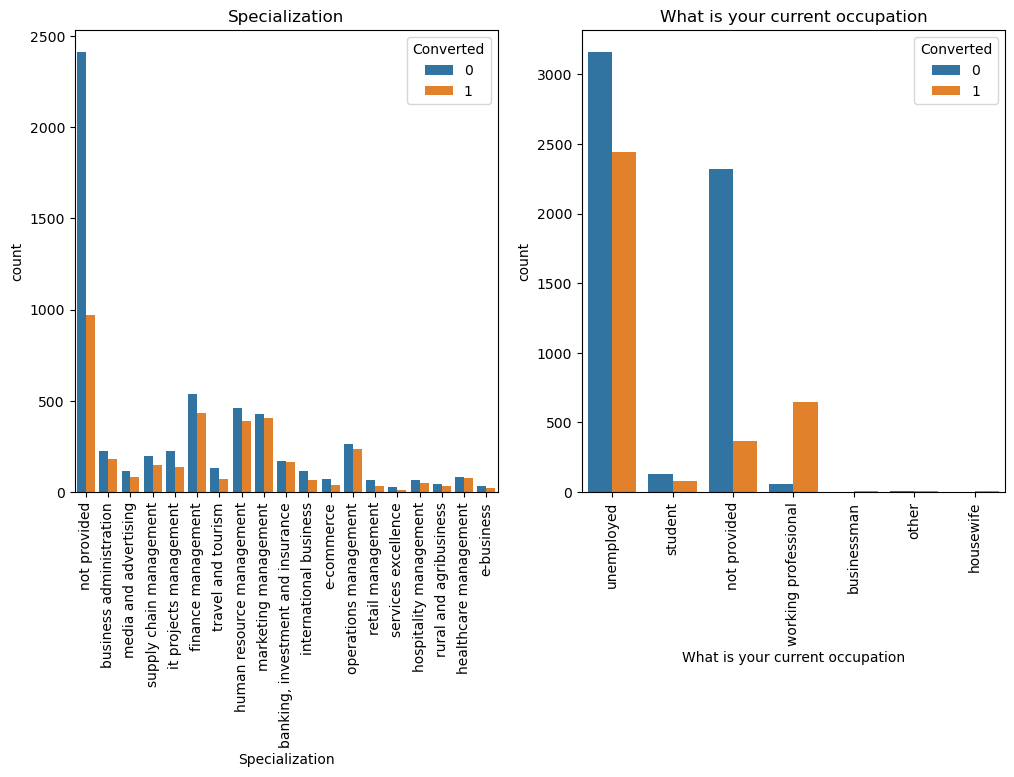

In [44]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

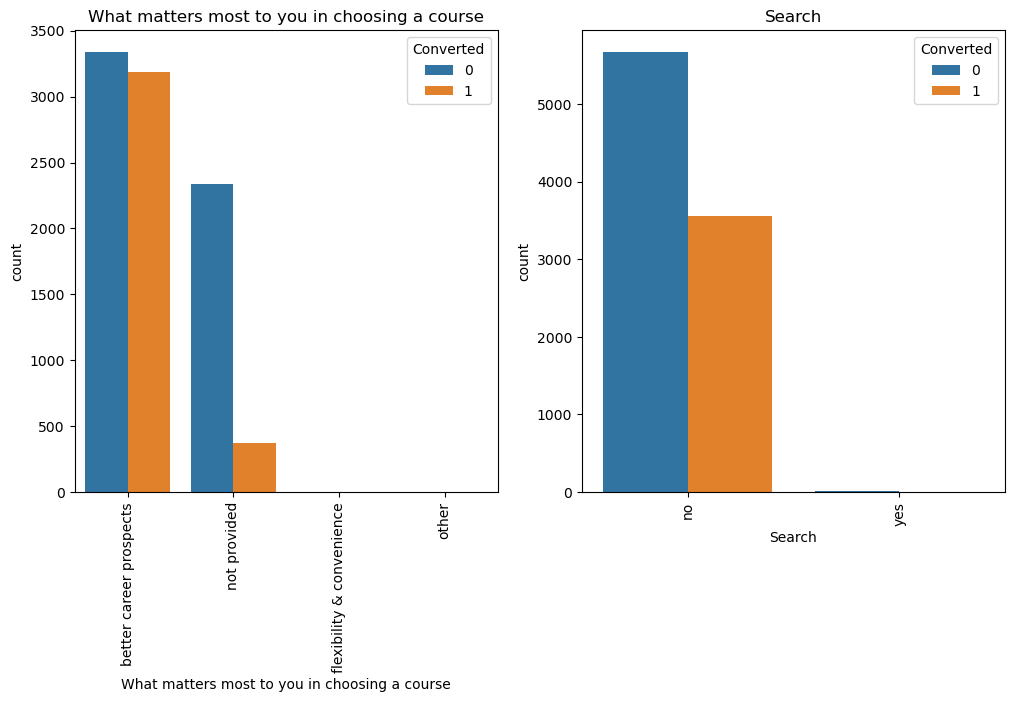

In [45]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

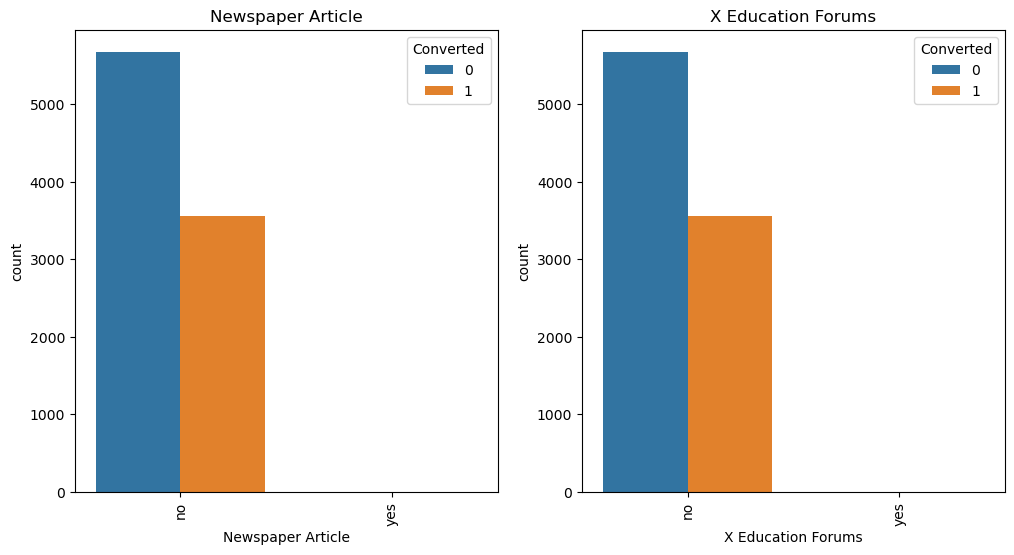

In [46]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

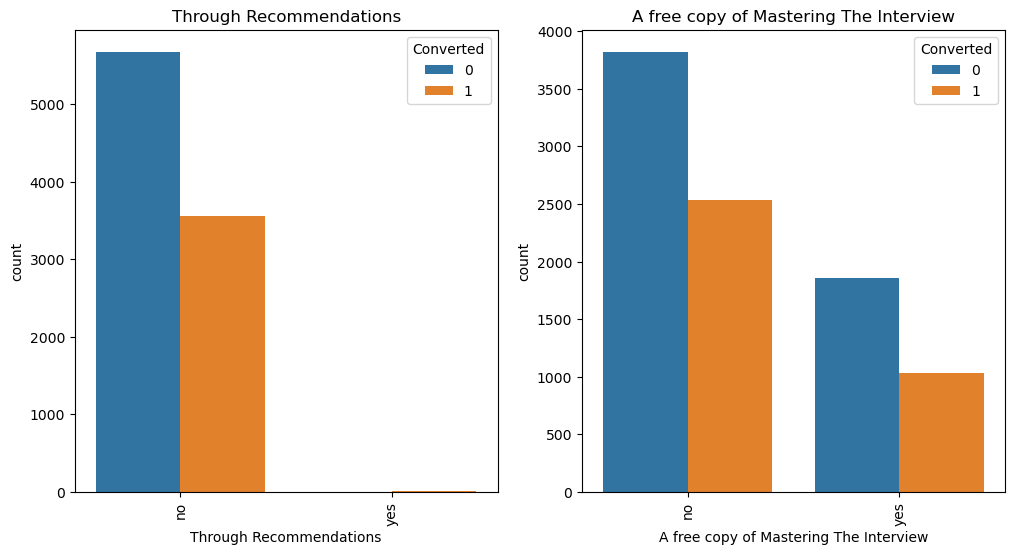

In [47]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

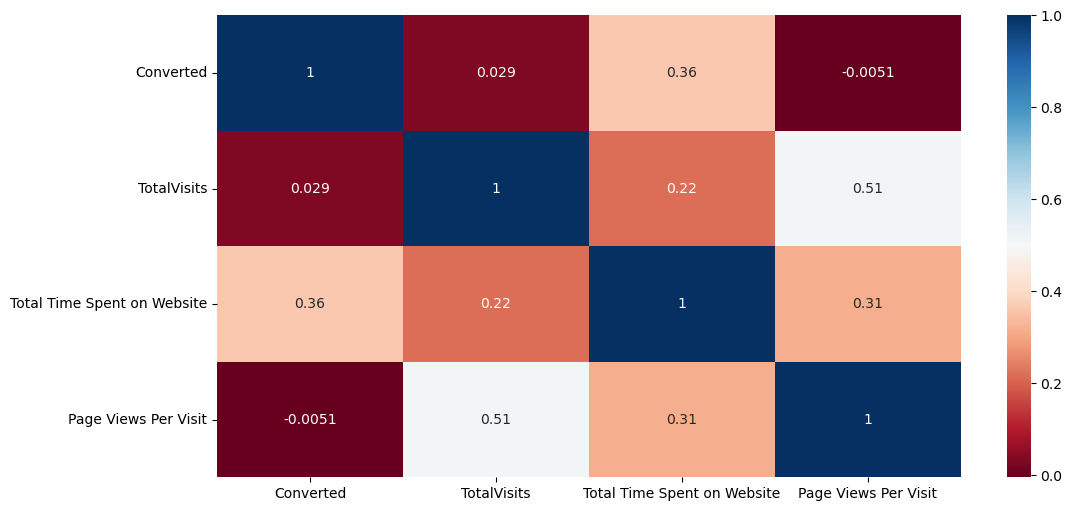

In [48]:
# To check the correlation among varibles

plt.figure(figsize=(12,6))
sns.heatmap(Lead_df_final.corr(), annot = True, cmap="RdBu")

plt.show()

#### It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [49]:
numeric = Lead_df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

#### There aren't any major outliers, so moving on to analysis


## Creating Dummy Variables

In [50]:
Lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

In [51]:
Lead_df_final.loc[:, Lead_df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_df_final_dum = pd.concat([Lead_df_final, dummy], axis=1)
Lead_df_final_dum

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         api      olark chat           no          no   
1                         api  organic search           no          no   
2     landing page submission  direct traffic           no          no   
3     landing page submission  direct traffic           no          no   
4     landing page submission          google           no          no   
...                       ...             ...          ...         ...   
9235  landing page submission  direct traffic          yes          no   
9236  landing page submission  direct traffic           no          no   
9237  landing page submission  direct traffic          yes          no   
9238  landing page submission          google           no          no   
9239  landing page submission  direct traffic           no          no   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit        Country             Specialization  \
0                     0.00   not provided               not provided   
1                     2.50          india               not provided   
2                     2.00          india    business administration   
3                     1.00          india      media and advertising   
4                     1.00          india               not provided   
...                    ...            ...                        ...   
9235                  2.67  outside india     it projects management   
9236                  2.00          india      media and advertising   
9237                  2.00          india    business administration   
9238                  3.00          india  human resource management   
9239                  3.00  outside india    supply chain management   

     What is your current occupation  \
0                         unemployed   
1                         unemployed   
2                            student   
3                         unemployed   
4                         unemployed   
...                              ...   
9235                      unemployed   
9236                      unemployed   
9237                      unemployed   
9238                    not provided   
9239                      unemployed   

     What matters most to you in choosing a course Search Newspaper Article  \
0                          better career prospects     no                no   
1                          better career prospects     no                no   
2                          better career prospects     no                no   
3                          better career prospects     no                no   
4                          better career prospects     no                no   
...                                            ...    ...               ...   
9235                       better career prospects     no                no   
9236                       better career prospects     no                no   
9237                       better career prospects     no                no   
9238                                  not provided     no                no   
9239                       better career prospects     no                no   

     X Education Forums Newspaper Digital Advertisement  \
0                    no        no         

In [53]:
# Dropping the not required variables, with 'errors=ignore' to skip missing columns
Lead_df_final_dum = Lead_df_final_dum.drop([
    'What is your current occupation_not provided',
    'Lead Origin', 
    'Lead Source', 
    'Do Not Email', 
    'Do Not Call', 
    'Country', 
    'Specialization', 
    'Specialization_not provided',
    'What is your current occupation',
    'What matters most to you in choosing a course', 
    'Search',
    'Newspaper Article', 
    'X Education Forums', 
    'Newspaper',
    'Digital Advertisement', 
    'Through Recommendations',
    'A free copy of Mastering The Interview', 
    'Last Notable Activity'], axis=1, errors='ignore')

# Display the DataFrame after dropping the columns
Lead_df_final_dum

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_landing page submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Lead Origin_quick add form  Specialization_business administration  \
0                              0                                       0   
1                              0                                       0   
2                              0                                       1   
3                              0                                       0   
4                              0                                       0   
...                          ...                                     ...   
9235                           0                                       0   
9236                           0                                       0   
9237                           0                                       1   
9238                           0                                       0   
9239                           0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
9235                          0                          0   
9236                          0                          0   
9237                          0                          0   
9238                          0                          0   
9239                          0                          0   

      Specialization_finance management  Specialization_healthcare management  \
0       

## Test-Train Split


In [54]:
# Import the required library for Train - Test Split

from sklearn.model_selection import train_test_split

In [55]:
X = Lead_df_final_dum.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Origin_quick add form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Specialization_business administration  Specialization_e-business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_e-commerce  Specialization_finance management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_healthcare management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_hospitality management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_human resource management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_international business  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_it projects management  Specialization_marketing management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_media and advertising  Specialization_operations management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                       

In [56]:
# Putting the target variable in y

y = Lead_df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [58]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112     0.007968                     0.182867              0.083333   
8413     0.019920                     0.679538              0.208333   
2961     0.011952                     0.553928              0.041667   
24       0.023904                     0.504660              0.062500   
2740     0.011952                     0.445184              0.125000   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
3112                                    1                          0   
8413                                    1                          0   
2961                                    0                          1   
24                                      0                          0   
2740                                    1                          0   

      Lead Origin_lead import  Lead Origin_quick add form  \
3112                        0                           0   
8413                        0                           0   
2961                        0                           0   
24                          0                           0   
2740                        0                           0   

      Specialization_business administration  Specialization_e-business  \
3112                                       0                          0   
8413                                       0                          0   
2961                                       0                          0   
24                                         0                          0   
2740                                       0                          0   

      Specialization_e-commerce  Specialization_finance management  \
3112                          1                                  0   
8413                          0                                  0   
2961                          0                                  0   
24                            0                                  0   
2740                          0                                  0   

      Specialization_healthcare management  \
3112                                     0   
8413                                     0   
2961                                     0   
24                                       0   
2740                                     0   

      Specialization_hospitality management  \
3112                                      0   
8413                                      0   
2961                                      0   
24                                        0   
2740                                      0   

      Specialization_human resource management  \
3112                                         0   
8413                                         0   
2961                                         1   
24                                           0   
2740                                         0   

      Specialization_international business  \
3112                                      0   
8413                                      0   
2961                                      0   
24                                        0   
2740                                      0   

      Specialization_it projects management  \
3112                                      0   
8413                                      0   
2961                                      0   
24                                        0   
2740                                      0   

      Specialization_marketing management  \
3112                                    0   
8413                                    1   
2961                                    0   
24                                      1   
2740                                    0   

      Specialization_media and advertising  \
3112                                     0   
8413                                     0   
2961                                     0   
24                 

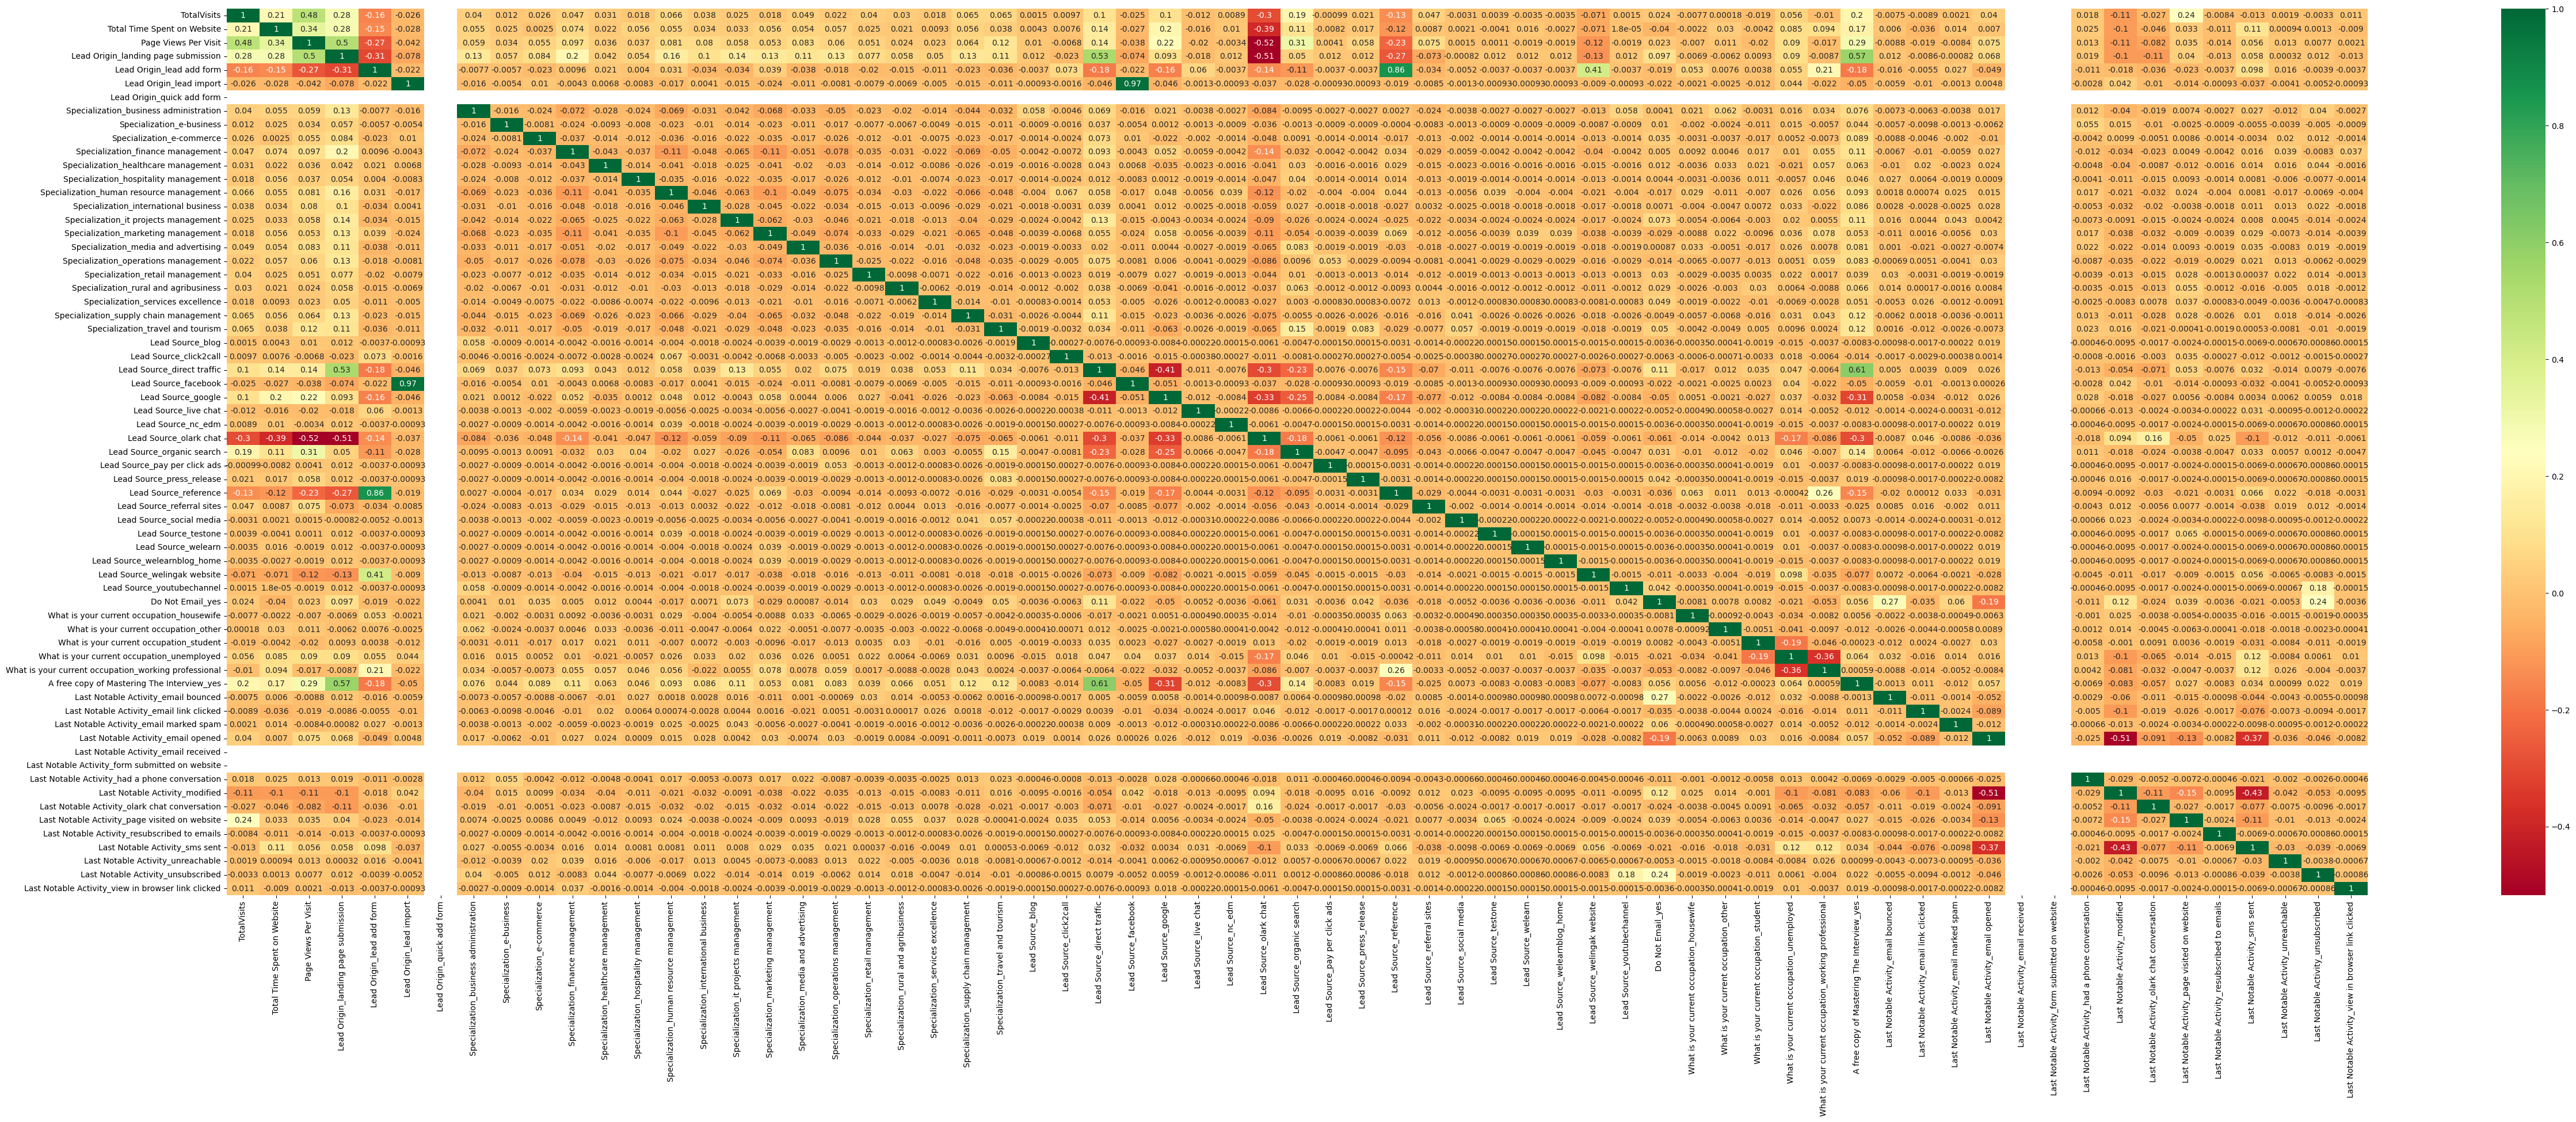

In [59]:
# Checking collinearity via heat map

plt.figure(figsize=(60,20))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Since there are a lot of variables it is difficult to drop variable. We'll check this after RFE

## Model Building 


In [60]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
# Import RFE

from sklearn.feature_selection import RFE

In [62]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model on the training data
rfe = rfe.fit(X_train, y_train)


In [63]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 13),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 46),
 ('Lead Origin_quick add form', False, 49),
 ('Specialization_business administration', False, 24),
 ('Specialization_e-business', False, 14),
 ('Specialization_e-commerce', False, 22),
 ('Specialization_finance management', False, 21),
 ('Specialization_healthcare management', False, 12),
 ('Specialization_hospitality management', False, 36),
 ('Specialization_human resource management', False, 18),
 ('Specialization_international business', False, 29),
 ('Specialization_it projects management', False, 20),
 ('Specialization_marketing management', False, 16),
 ('Specialization_media and advertising', False, 28),
 ('Specialization_operations management', False, 19),
 ('Specialization_retail management', False, 39),
 ('Specialization_rural and agrib

In [64]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

#### All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [65]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [66]:
# Importing statsmodels
import statsmodels.api as sm

In [67]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.8
Date:                Sun, 25 Aug 2024   Deviance:                       5315.6
Time:                        13:57:51   Pearson chi2:                 6.93e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4022
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5079      0.111    -31.733      0.000      -3.725      -3.291
TotalVisits                                              6.4904      2.085      3.113      0.002       2.404      10.577
Total Time Spent on Website                              4.5732      0.166     27.561      0.000       4.248       4.898
Lead Origin_lead add form                                3.7398      0.200     18.725      0.000       3.348       4.131
Lead Source_olark chat                                   1.1749      0.106     11.076      0.000       0.967       1.383
Lead Source_welingak website                             2.6136      1.030      2.538      0.011       0.595       4.632
Do Not Email_yes                                        -1.5854      0.176     -8.997      0.000      -1.931      -1.240
What is your current occupation_housewife               23.3996   1.88e+04      0.001      0.999   -3.68e+04    3.68e+04
What is your current occupation_student                  1.2909      0.219      5.901      0.000       0.862       1.720
What is your current occupation_unemployed               1.1877      0.087     13.640      0.000       1.017       1.358
What is your current occupation_working professional     3.7065      0.195     19.016      0.000       3.324       4.089
Last Notable Activity_had a phone conversation           3.2624      1.165      2.801      0.005       0.980       5.545
Last Notable Activity_resubscribed to emails            24.8991   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_sms sent                           1.6281      0.079     20.599      0.000       1.473       1.783
Last Notable Activity_unreachable                        2.6938      0.688      3.914      0.000       1.345       4.043
Last Notable Activity_unsubscribed                       1.4593      0.545      2.677      0.007       0.391       2.528
========================================================================================================================
"""

In [68]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8          What is your current occupation_unemployed  2.21
1                         Total Time Spent on Website  1.89
2                           Lead Origin_lead add form  1.50
0                                         TotalVisits  1.48
12                     Last Notable Activity_sms sent  1.38
9   What is your current occupation_working profes...  1.34
4                        Lead Source_welingak website  1.24
3                              Lead Source_olark chat  1.13
5                                    Do Not Email_yes  1.12
14                 Last Notable Activity_unsubscribed  1.07
7             What is your current occupation_student  1.04
6           What is your current occupation_housewife  1.01
10     Last Notable Activity_had a phone conversation  1.00
11       Last Notable Activity_resubscribed to emails  1.00
13                  Last Notable Activity_unreachable  1.00

#### The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'

In [70]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [71]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.8
Date:                Sun, 25 Aug 2024   Deviance:                       5327.6
Time:                        13:58:25   Pearson chi2:                 6.93e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5014      0.110    -31.701      0.000      -3.718      -3.285
TotalVisits                                              6.6344      2.092      3.171      0.002       2.534      10.735
Total Time Spent on Website                              4.5673      0.166     27.570      0.000       4.243       4.892
Lead Origin_lead add form                                3.7336      0.200     18.698      0.000       3.342       4.125
Lead Source_olark chat                                   1.1689      0.106     11.027      0.000       0.961       1.377
Lead Source_welingak website                             2.6133      1.030      2.538      0.011       0.595       4.632
Do Not Email_yes                                        -1.5900      0.176     -9.027      0.000      -1.935      -1.245
What is your current occupation_housewife               23.3948   1.88e+04      0.001      0.999   -3.68e+04    3.68e+04
What is your current occupation_student                  1.2873      0.219      5.887      0.000       0.859       1.716
What is your current occupation_unemployed               1.1900      0.087     13.677      0.000       1.019       1.361
What is your current occupation_working professional     3.7026      0.195     19.007      0.000       3.321       4.084
Last Notable Activity_resubscribed to emails            24.8986   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_sms sent                           1.6207      0.079     20.527      0.000       1.466       1.776
Last Notable Activity_unreachable                        2.6858      0.688      3.902      0.000       1.337       4.035
Last Notable Activity_unsubscribed                       1.4572      0.545      2.675      0.007       0.389       2.525
========================================================================================================================
"""

In [72]:
# Make a VIF dataframe for all the available variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8          What is your current occupation_unemployed  2.21
1                         Total Time Spent on Website  1.89
2                           Lead Origin_lead add form  1.50
0                                         TotalVisits  1.48
11                     Last Notable Activity_sms sent  1.38
9   What is your current occupation_working profes...  1.34
4                        Lead Source_welingak website  1.24
3                              Lead Source_olark chat  1.13
5                                    Do Not Email_yes  1.12
13                 Last Notable Activity_unsubscribed  1.07
7             What is your current occupation_student  1.04
6           What is your current occupation_housewife  1.01
10       Last Notable Activity_resubscribed to emails  1.00
12                  Last Notable Activity_unreachable  1.00

#### The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'


In [73]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [74]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.1
Date:                Sun, 25 Aug 2024   Deviance:                       5338.2
Time:                        13:58:53   Pearson chi2:                 6.96e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4816      0.110    -31.691      0.000      -3.697      -3.266
TotalVisits                                              6.5889      2.089      3.155      0.002       2.495      10.682
Total Time Spent on Website                              4.5646      0.166     27.580      0.000       4.240       4.889
Lead Origin_lead add form                                3.7662      0.200     18.871      0.000       3.375       4.157
Lead Source_olark chat                                   1.1617      0.106     10.975      0.000       0.954       1.369
Lead Source_welingak website                             2.5799      1.030      2.505      0.012       0.562       4.598
Do Not Email_yes                                        -1.5948      0.176     -9.049      0.000      -1.940      -1.249
What is your current occupation_student                  1.2695      0.219      5.808      0.000       0.841       1.698
What is your current occupation_unemployed               1.1727      0.087     13.555      0.000       1.003       1.342
What is your current occupation_working professional     3.6844      0.195     18.935      0.000       3.303       4.066
Last Notable Activity_resubscribed to emails            22.8860   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Notable Activity_sms sent                           1.6171      0.079     20.490      0.000       1.462       1.772
Last Notable Activity_unreachable                        2.6780      0.688      3.893      0.000       1.330       4.026
Last Notable Activity_unsubscribed                       1.4559      0.545      2.670      0.008       0.387       2.525
========================================================================================================================
"""

#### The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity_resubscribed to emails'

In [75]:
X_train.drop('Last Notable Activity_resubscribed to emails', axis = 1, inplace = True)

In [76]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7          What is your current occupation_unemployed  2.21
1                         Total Time Spent on Website  1.89
2                           Lead Origin_lead add form  1.49
0                                         TotalVisits  1.48
9                      Last Notable Activity_sms sent  1.38
8   What is your current occupation_working profes...  1.34
4                        Lead Source_welingak website  1.24
3                              Lead Source_olark chat  1.13
5                                    Do Not Email_yes  1.12
11                 Last Notable Activity_unsubscribed  1.07
6             What is your current occupation_student  1.04
10                  Last Notable Activity_unreachable  1.00

In [77]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.5
Date:                Sun, 25 Aug 2024   Deviance:                       5343.0
Time:                        13:59:26   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4770      0.110    -31.686      0.000      -3.692      -3.262
TotalVisits                                              6.5805      2.088      3.152      0.002       2.488      10.673
Total Time Spent on Website                              4.5628      0.165     27.577      0.000       4.238       4.887
Lead Origin_lead add form                                3.7661      0.200     18.872      0.000       3.375       4.157
Lead Source_olark chat                                   1.1656      0.106     11.020      0.000       0.958       1.373
Lead Source_welingak website                             2.5800      1.030      2.505      0.012       0.562       4.598
Do Not Email_yes                                        -1.5949      0.176     -9.052      0.000      -1.940      -1.250
What is your current occupation_student                  1.2645      0.219      5.787      0.000       0.836       1.693
What is your current occupation_unemployed               1.1683      0.086     13.521      0.000       0.999       1.338
What is your current occupation_working professional     3.6799      0.195     18.918      0.000       3.299       4.061
Last Notable Activity_sms sent                           1.6159      0.079     20.481      0.000       1.461       1.771
Last Notable Activity_unreachable                        2.6759      0.688      3.891      0.000       1.328       4.024
Last Notable Activity_unsubscribed                       1.4547      0.545      2.669      0.008       0.386       2.523
========================================================================================================================
"""

In [78]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7          What is your current occupation_unemployed  2.21
1                         Total Time Spent on Website  1.89
2                           Lead Origin_lead add form  1.49
0                                         TotalVisits  1.48
9                      Last Notable Activity_sms sent  1.38
8   What is your current occupation_working profes...  1.34
4                        Lead Source_welingak website  1.24
3                              Lead Source_olark chat  1.13
5                                    Do Not Email_yes  1.12
11                 Last Notable Activity_unsubscribed  1.07
6             What is your current occupation_student  1.04
10                  Last Notable Activity_unreachable  1.00

#### All the VIF values are good and all the p-values are below 0.05. So we can fix mode

## Prediction


In [79]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.194373
8413    0.926827
2961    0.984628
24      0.537753
2740    0.450480
489     0.241768
9116    0.616074
4176    0.228394
8537    0.659531
6267    0.130108
dtype: float64

In [80]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19437342, 0.92682674, 0.98462792, 0.53775254, 0.45048035,
       0.2417679 , 0.61607381, 0.22839353, 0.65953138, 0.13010774])

In [81]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.194373
1          1         0.926827
2          1         0.984628
3          1         0.537753
4          0         0.450480

In [82]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.194373          0
1          1         0.926827          1
2          1         0.984628          1
3          1         0.537753          1
4          0         0.450480          0

## Model Evaluation

In [83]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [84]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  468],
       [ 751, 1763]], dtype=int64)

In [85]:
#### From the above matrix we can say that 

#### Predicted         not_converted    converted
#### Actual
#### not_converted              3486        468
#### converted                   751       1763

In [86]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8115337043908473

<font color= green>___That's around 81% accuracy witch is a very good value___</font>

In [87]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [88]:
# Calculating the sensitivity
TP/(TP+FN)

0.7012728719172633

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.881638846737481

#### With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 88%.

## Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [90]:
# Definiting ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

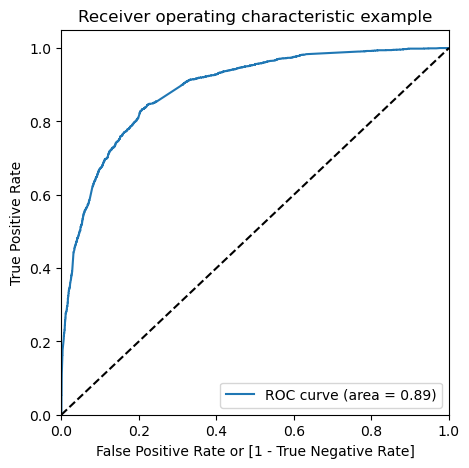

In [92]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


#### The area under ROC curve is 0.89 which is a very good value.

In [93]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.194373          0    1    1    0    0    0    0    0   
1          1         0.926827          1    1    1    1    1    1    1    1   
2          1         0.984628          1    1    1    1    1    1    1    1   
3          1         0.537753          1    1    1    1    1    1    1    0   
4          0         0.450480          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [94]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.616265  0.978520  0.385938
0.2   0.2  0.754484  0.917263  0.650986
0.3   0.3  0.805813  0.835720  0.786798
0.4   0.4  0.809369  0.775259  0.831057
0.5   0.5  0.811534  0.701273  0.881639
0.6   0.6  0.806122  0.634447  0.915276
0.7   0.7  0.782004  0.523071  0.946636
0.8   0.8  0.764069  0.441925  0.968892
0.9   0.9  0.715059  0.288783  0.986090

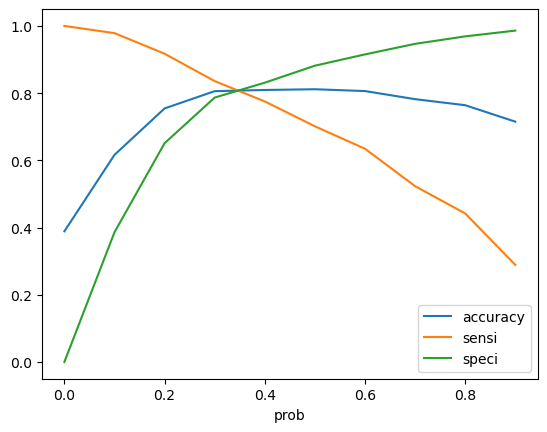

In [95]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.35.

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.194373          0    1    1    0    0    0    0    0   
1          1         0.926827          1    1    1    1    1    1    1    1   
2          1         0.984628          1    1    1    1    1    1    1    1   
3          1         0.537753          1    1    1    1    1    1    1    0   
4          0         0.450480          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                1  
4    0    0    0                1

In [97]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8050401978973407

In [98]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3187,  767],
       [ 494, 2020]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [100]:
# Calculating the sensitivity
TP/(TP+FN)

0.8035003977724742

In [101]:
# Calculating the specificity
TN/(TN+FP)

0.8060192210419828

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.


## Prediction on Test dataset

In [102]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [103]:
# Substituting all the columns in the final train model
col = X_train.columns

In [104]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
567     1.0     0.015936                     0.147359   
2303    1.0     0.007968                     0.688859   
1523    1.0     0.011952                     0.596538   
6923    1.0     0.019920                     0.083000   
7841    1.0     0.007968                     0.311585   
...     ...          ...                          ...   
9124    1.0     0.007968                     0.118065   
1049    1.0     0.031873                     0.703506   
7778    1.0     0.007968                     0.135375   
6432    1.0     0.000000                     0.000000   
924     1.0     0.031873                     0.118065   

      Lead Origin_lead add form  Lead Source_olark chat  \
567                           0                       0   
2303                          0                       0   
1523                          0                       0   
6923                          0                       0   
7841                          0                       0   
...                         ...                     ...   
9124                          0                       0   
1049                          0                       0   
7778                          0                       0   
6432                          0                       1   
924                           0                       0   

      Lead Source_welingak website  Do Not Email_yes  \
567                              0                 0   
2303                             0                 0   
1523                             0                 0   
6923                             0                 0   
7841                             0                 0   
...                            ...               ...   
9124                             0                 0   
1049                             0                 0   
7778                             0                 0   
6432                             0                 0   
924                              0                 0   

      What is your current occupation_student  \
567                                         0   
2303                                        0   
1523                                        0   
6923                                        0   
7841                                        0   
...                                       ...   
9124                                        0   
1049                                        0   
7778                                        0   
6432                                        0   
924                                         0   

      What is your current occupation_unemployed  \
567                                            1   
2303                                           1   
1523                                           1   
6923                                           1   
7841                                           1   
...                                          ...   
9124                                           0   
1049                                           1   
7778                                           1   
6432                                           1   
924                                            1   

      What is your current occupation_working professional  \
567                                                   0      
2303                                                  0      
1523                                                  0      
6923                                                  0      
7841                                                  0      
...                                                 ...      
9124                                                  0      
1049                                                  0      
7778                                                  0      
6432                                                  0      
924                                        

In [105]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.177786
1          0         0.708247
2          0         0.620545
3          0         0.141990
4          0         0.302688

In [106]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.177786                0
1             0         0.708247                1
2             0         0.620545                1
3             0         0.141990                0
4             0         0.302688                0
...         ...              ...              ...
2767          0         0.052859                0
2768          0         0.752319                1
2769          0         0.162664                0
2770          0         0.616074                1
2771          0         0.173616                0

[2772 rows x 3 columns]

In [107]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8124098124098124

In [108]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1407,  318],
       [ 202,  845]], dtype=int64)

In [109]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [110]:
# Calculating the sensitivity
TP/(TP+FN)

0.8070678127984718

In [111]:
# Calculating the specificity
TN/(TN+FP)

0.8156521739130435

#### With the current cut off as 0.35 we have accuracy, sensitivity is around 80% and specificity around 81%

## Precision-Recall

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  468],
       [ 751, 1763]], dtype=int64)

In [113]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  468],
       [ 751, 1763]], dtype=int64)

In [114]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7012728719172633

#### With the current cut off as 0.35 we have Precision around 79% and Recall around 70%.

###  Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve

In [116]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

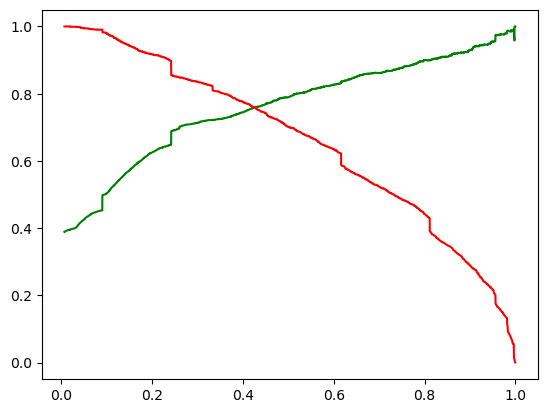

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.194373          0    1    1    0    0    0    0    0   
1          1         0.926827          1    1    1    1    1    1    1    1   
2          1         0.984628          1    1    1    1    1    1    1    1   
3          1         0.537753          1    1    1    1    1    1    1    0   
4          0         0.450480          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                1  
4    0    0    0                1

In [120]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112244897959183

In [121]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3312,  642],
       [ 579, 1935]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7508731082654249

In [124]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7696897374701671

#### With the current cut off as 0.41 we have Precision around 75% and Recall around 76%

## Prediction on Test set

In [125]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.177786
1          0         0.708247
2          0         0.620545
3          0         0.141990
4          0         0.302688

In [126]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.177786                0
1             0         0.708247                1
2             0         0.620545                1
3             0         0.141990                0
4             0         0.302688                0
...         ...              ...              ...
2767          0         0.052859                0
2768          0         0.752319                1
2769          0         0.162664                0
2770          0         0.616074                1
2771          0         0.173616                0

[2772 rows x 3 columns]

In [127]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8145743145743146

In [128]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1456,  269],
       [ 245,  802]], dtype=int64)

In [129]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [130]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7488328664799253

In [131]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7659980897803247

#### With the current cut off as 0.41 we have Precision around 74% and Recall around 76%

##  Conclusion:

We have found that the following variables and features that mattered the most in the potential lead becoming a buyer are (In descending order) :

- When the lead is spending more time on website showing its interest. We can increase this by making the lead more engaged in the website.
- Number of times lead is visiting the website. More number of times increases the rate of conversion.
- When the source of lead is from Google ;Direct traffic ;Organic search ;Welingak website respectively their interest in our product decreases. This shows our main focus group to target.
- When the last activity of the lead was either SMS or Olark chat conversation. This shows their activity level.
- When the lead origin is Lead add format.
- If the occupation given by lead is working professional than it shows that they are needing some advancement in their career.

X Education can be benefitted from observations by focusing more on above mentioned features as these has very high impact on the mind-set of potential leads and can help them to become a buyer of our courses and keeping a good convention rate for the company.